In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
data_df = pd.DataFrame(digits.data)
data_df['label'] = digits.target
new_cols = [f'pixel{i}' for i in range(digits.data.shape[1])]
column_mapping = dict(zip(data_df.columns[:-1], new_cols))
data_df.rename(columns=column_mapping, inplace=True)
cols = ['label'] + new_cols
data_df = data_df[cols]
file_path = 'mnist_sample_data.csv'
data_df.to_csv(file_path, index=False)
print(f"✅ CSV File Created: {file_path}")
print("\n📊 First 5 rows of the generated CSV file:")
print(data_df.head())
print("\n" + "="*60 + "\n")

✅ CSV File Created: mnist_sample_data.csv

📊 First 5 rows of the generated CSV file:
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      0     0.0     0.0     5.0    13.0     9.0     1.0     0.0     0.0   
1      1     0.0     0.0     0.0    12.0    13.0     5.0     0.0     0.0   
2      2     0.0     0.0     0.0     4.0    15.0    12.0     0.0     0.0   
3      3     0.0     0.0     7.0    15.0    13.0     1.0     0.0     0.0   
4      4     0.0     0.0     0.0     1.0    11.0     0.0     0.0     0.0   

   pixel8  ...  pixel54  pixel55  pixel56  pixel57  pixel58  pixel59  pixel60  \
0     0.0  ...      0.0      0.0      0.0      0.0      6.0     13.0     10.0   
1     0.0  ...      0.0      0.0      0.0      0.0      0.0     11.0     16.0   
2     0.0  ...      5.0      0.0      0.0      0.0      0.0      3.0     11.0   
3     0.0  ...      9.0      0.0      0.0      0.0      7.0     13.0     13.0   
4     0.0  ...      0.0      0.0      0.0      0.0   

In [5]:
print("--- 2. Load Data from CSV into Pandas DataFrame ---")
try:
   df = pd.read_csv(file_path)
   print(f"✅ Data successfully loaded. Shape: {df.shape}")
   print("\nℹ️ DataFrame Info:")
   df.info(verbose=False)
except Exception as e:
   print(f"❌ Error loading CSV: {e}")
   raise SystemExit
print("\n" + "="*60 + "\n")

--- 2. Load Data from CSV into Pandas DataFrame ---
✅ Data successfully loaded. Shape: (1797, 65)

ℹ️ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Columns: 65 entries, label to pixel63
dtypes: float64(64), int64(1)
memory usage: 912.7 KB




In [7]:
print("--- 3. Pandas Data Management and Preprocessing ---")
X_df = df.drop('label', axis=1)
y_df = df['label']
print(f"Feature Data (X) Shape: {X_df.shape}")
print(f"Target Data (y) Shape: {y_df.shape}")
max_pixel_value = X_df.values.max()
X_df = X_df / max_pixel_value
print(f"\n✅ Features normalized by dividing by {max_pixel_value}.")
print(f"Maximum pixel value after normalization: {X_df.values.max():.2f}")
print("\n" + "="*60 + "\n")

--- 3. Pandas Data Management and Preprocessing ---
Feature Data (X) Shape: (1797, 64)
Target Data (y) Shape: (1797,)

✅ Features normalized by dividing by 16.0.
Maximum pixel value after normalization: 1.00




In [9]:
print("--- 4. Conversion to NumPy Arrays (Array Concept) ---")
X_numpy = X_df.values
y_numpy = y_df.values
print(f"Type of Feature Array (X): {type(X_numpy)}")
print(f"Shape of Feature Array (X): {X_numpy.shape} → ({X_numpy.shape[0]} images, {X_numpy.shape[1]} pixels)")
print(f"Type of Target Array (y): {type(y_numpy)}")
print(f"Shape of Target Array (y): {y_numpy.shape}")
print("\n🔍 First 10 pixel values of the first image (NumPy Array):")
print(X_numpy[0][:10])
print(f"Label for the first image: {y_numpy[0]}")
print("\n" + "="*60 + "\n")

--- 4. Conversion to NumPy Arrays (Array Concept) ---
Type of Feature Array (X): <class 'numpy.ndarray'>
Shape of Feature Array (X): (1797, 64) → (1797 images, 64 pixels)
Type of Target Array (y): <class 'numpy.ndarray'>
Shape of Target Array (y): (1797,)

🔍 First 10 pixel values of the first image (NumPy Array):
[0.     0.     0.3125 0.8125 0.5625 0.0625 0.     0.     0.     0.    ]
Label for the first image: 0




--- 5. Using NumPy for Array Operations (Reshaping Example) ---
Original vector shape: (64,)
Reshaped matrix shape: (8, 8)

🧩 Reshaped 8x8 Image Matrix (first image):
[[0.     0.     0.3125 0.8125 0.5625 0.0625 0.     0.    ]
 [0.     0.     0.8125 0.9375 0.625  0.9375 0.3125 0.    ]
 [0.     0.1875 0.9375 0.125  0.     0.6875 0.5    0.    ]
 [0.     0.25   0.75   0.     0.     0.5    0.5    0.    ]
 [0.     0.3125 0.5    0.     0.     0.5625 0.5    0.    ]
 [0.     0.25   0.6875 0.     0.0625 0.75   0.4375 0.    ]
 [0.     0.125  0.875  0.3125 0.625  0.75   0.     0.    ]
 [0.     0.     0.375  0.8125 0.625  0.     0.     0.    ]]


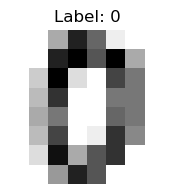



🎉 Data Preprocessing and Management Workflow Complete.


In [11]:
print("--- 5. Using NumPy for Array Operations (Reshaping Example) ---")
image_vector = X_numpy[0]
image_matrix = image_vector.reshape(8, 8)
print(f"Original vector shape: {image_vector.shape}")
print(f"Reshaped matrix shape: {image_matrix.shape}")
print("\n🧩 Reshaped 8x8 Image Matrix (first image):")
print(image_matrix)
plt.figure(figsize=(2, 2))
plt.imshow(image_matrix, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f'Label: {y_numpy[0]}')
plt.axis('off')
plt.show()
print("\n" + "="*60 + "\n")
print("🎉 Data Preprocessing and Management Workflow Complete.")